In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from datetime import datetime
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('kc_house_data_train.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [5]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [8]:
df['year'].value_counts()

2014    11703
2015     5587
Name: year, dtype: int64

In [19]:
df['month']

0        10
1         8
2         8
3         3
4         7
         ..
17285     3
17286     5
17287     5
17288    12
17289     1
Name: month, Length: 17290, dtype: int64

In [40]:
jan = df[df['month'] == 1]['price'].mean()
feb = df[df['month'] == 2]['price'].mean()
mar = df[df['month'] == 3]['price'].mean()
apr = df[df['month'] == 4]['price'].mean()
may = df[df['month'] == 5]['price'].mean()
jun = df[df['month'] == 6]['price'].mean()
jul = df[df['month'] == 7]['price'].mean()
aug = df[df['month'] == 8]['price'].mean()
sep = df[df['month'] == 9]['price'].mean()
octb = df[df['month'] == 10]['price'].mean()
nov = df[df['month'] == 11]['price'].mean()
dec = df[df['month'] == 12]['price'].mean()

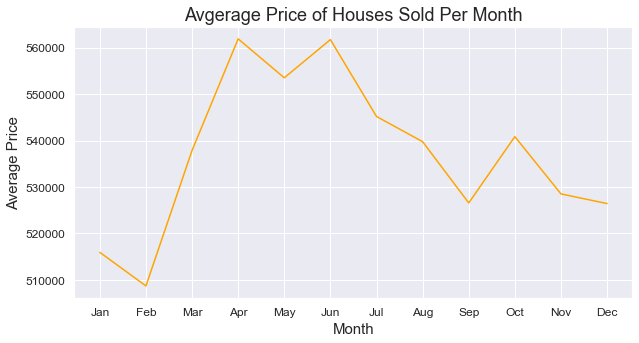

In [226]:
fig,ax = plt.subplots(figsize = (10,5))
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y = [jan, feb, mar, apr, may, jun, jul, aug, sep, octb, nov, dec]
ax.plot(x,y, color = 'orange')
ax.set_title('Avgerage Price of Houses Sold Per Month', fontsize = 18)
ax.set_xlabel('Month', fontsize = 15)
ax.set_ylabel('Average Price', fontsize = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

WATERFRONT

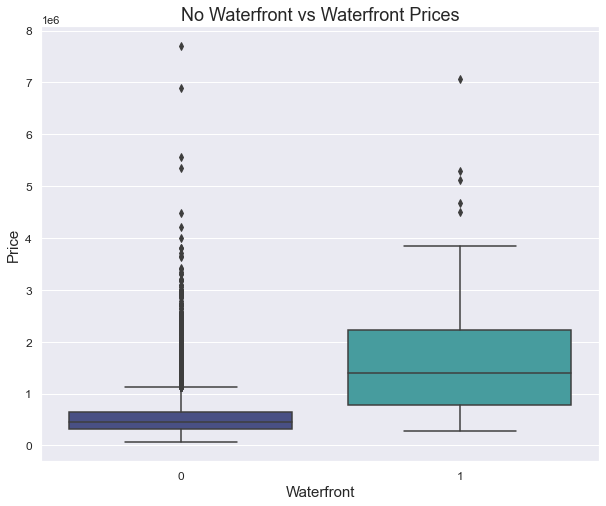

In [99]:
f, axes = plt.subplots(1, figsize=(10,8))
sns.set(style="darkgrid")
bx = sns.boxplot(x=df['waterfront'],y=df['price'], palette = 'mako')
bx.axes.set_title("No Waterfront vs Waterfront Prices",fontsize=18)
bx.set_xlabel("Waterfront",fontsize=15)
bx.set_ylabel("Price",fontsize=15)
bx.tick_params(labelsize=12)

In [105]:
conditions = [(df['yr_renovated'] == 0), 
            (df['yr_renovated'] != 0)]

choices = [(0),
          (2021 - df['yr_renovated'])]

df['yrs_since_reno'] = np.select(conditions, choices)

In [106]:
df['yrs_since_reno'].value_counts()

0     16564
7        71
14       32
16       32
21       31
      ...  
70        1
62        1
87        1
77        1
73        1
Name: yrs_since_reno, Length: 69, dtype: int64

In [113]:
twenties = df[((df['yr_built'] >= 2000) | (df['yrs_since_reno'] <= 21))]['price'].mean()
nineteens = df[((df['yr_built'] < 2000) | (df['yrs_since_reno'] > 21))]['price'].mean()

537626.9818095913 517946.02457564574


In [110]:
stats.ttest_ind(twenties, nineteens)

Ttest_indResult(statistic=4.744506362300696, pvalue=2.0996170901605192e-06)

In [117]:
y = (df[((df['yr_built'] >= 2000) | (df['yrs_since_reno'] <= 21))]['price'].value_counts().index)

In [ ]:
fig, ax = plt.subplots()
ax

In [179]:
north = df[df['lat'] >= 47.5]['price']
south = df[df['lat'] < 47.5]['price']

In [229]:
stats.ttest_ind(north, south)

Ttest_indResult(statistic=52.36034891408036, pvalue=0.0)

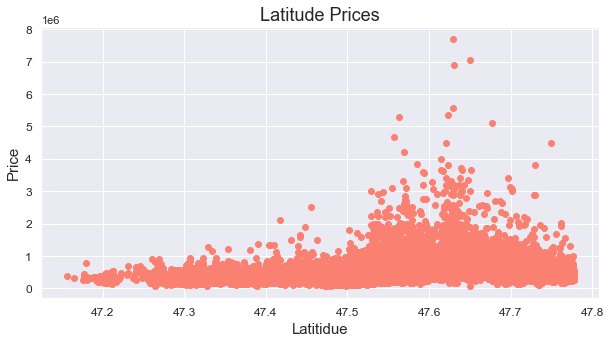

In [231]:
fig,ax = plt.subplots(figsize = (10,5))
x = df['lat']
y = df['price']
ax.scatter(x,y, color = 'salmon')
ax.set_title('Latitude Prices', fontsize = 18)
ax.set_xlabel('Latitidue', fontsize = 15)
ax.set_ylabel('Price', fontsize = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

In [195]:
conditions = [(df['lat'] >= 47.5),
             (df['lat'] < 47.5)]

choice = [('north'), ('south')]

df['n_s'] = np.select(conditions, choice)

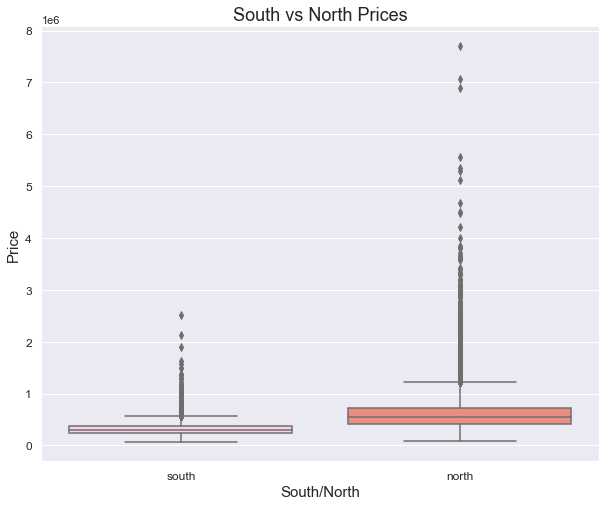

In [233]:
f, axes = plt.subplots(1, figsize=(10,8))
sns.set(style="darkgrid")
bx = sns.boxplot(x=df['n_s'],y=df['price'], palette = 'Set3_r')
bx.axes.set_title("South vs North Prices",fontsize=18)
bx.set_xlabel("South/North",fontsize=15)
bx.set_ylabel("Price",fontsize=15)
bx.tick_params(labelsize=12)

In [185]:
df['bedrooms'].replace(to_replace = 33, value = 3, inplace = True)

In [186]:
df.drop(columns = ['Unnamed: 0', 'id', 'date'], axis = 1, inplace = True)

In [242]:
#bedroom_dummies = pd.get_dummies(df['bedrooms'], prefix = 'bed', drop_first = True)
#floors_dummies = pd.get_dummies(df['floors'], prefix='flr', drop_first=True)
waterfront_dummies = pd.get_dummies(df['waterfront'], prefix='water', drop_first=True)
view_dummies = pd.get_dummies(df['view'], prefix='view', drop_first=True)
condition_dummies = pd.get_dummies(df['condition'], prefix='condition', drop_first=True)
grade_dummies = pd.get_dummies(df['grade'], prefix='grade', drop_first=True)
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix='zip', drop_first=True)
month_dummies = pd.get_dummies(df['month'], prefix = 'month', drop_first = True)
n_s_dummies = pd.get_dummies(df['n_s'], prefix = 'ns', drop_first = True)
price = df['price']

df_cat = pd.concat([df, waterfront_dummies, view_dummies, 
                    condition_dummies, grade_dummies, zipcode_dummies, month_dummies, n_s_dummies], 
                   axis=1)

#rename floor columns so do not receive error with decimals 
df_cat.rename(columns={"flr_1.5": "flr_1_5", "flr_2.0": "flr_2", "flr_2.5": "flr_2_5",  "flr_3.5": "flr_3_5", "flr_3.0": "flr_3"}, inplace = True)

outcome = 'price'
predictors = df_cat.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=df_cat).fit()
model.summary()

#INFERENTIAL PRESENTATION

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     763.5
Date:                Tue, 09 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:04:38   Log-Likelihood:            -2.3059e+05
No. Observations:               17290   AIC:                         4.614e+05
Df Residuals:                   17172   BIC:                         4.623e+05
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -1.76e+04   1435.079    -12.267      0.000   -2.04e+04   -1.48e+04
n_s[T.south]    5801.0227   5733.219      1.012      0.312   -5436.673     1.7e+04
nsew[T.nw]      5.277e+04   1.12e+04      4.724      0.000    3.09e+04    7.47e+04
nsew[T.se]        43.7403   8832.982      0.005      0.996   -1.73e+04    1.74e+04
nsew[T.sw]      5757.2824   6769.666      0.850      0.395   -7511.955     1.9e+04
bedrooms       -1.325e+04   1699.141     -7.798      0.000   -1.66e+04   -9919.512
bathrooms       2.367e+04   2767.625      8.553      0.000    1.82e+04    2.91e+04
sqft_living       94.4796      1.966     48.061      0.000      90.626      98.333
sqft_lot           0.2099      0.039      5.441      0.000       0.134       0.285
floors          -2.85e+04   3347.740     -8.513      0.000   -3.51e+04   -2.19e+04
waterfront      2.909e+05   8180.594     35.563      0.000    2.75e+05    3.07e+05
view            5.808e+04   1957.809     29.663      0.000    5.42e+04    6.19e+04
condition       4.561e+04   1.02e+04      4.452      0.000    2.55e+04    6.57e+04
grade           5.052e+04   1.84e+04      2.743      0.006    1.44e+04    8.66e+04
sqft_above        74.5971      2.055     36.301      0.000      70.569      78.625
sqft_basement     19.8825      2.280      8.719      0.000      15.413      24.352
yr_built        -260.2738     69.699     -3.734      0.000    -396.892    -123.656
yr_renovated      65.3855      5.461     11.973      0.000      54.681      76.090
zipcode        -1497.6695    174.215     -8.597      0.000   -1839.148   -1156.191
lat             1.365e+05   6.89e+04      1.983      0.047    1587.071    2.71e+05
long           -1.562e+05   4.89e+04     -3.195      0.001   -2.52e+05   -6.03e+04
sqft_living15     17.9383      3.060      5.862      0.000      11.940      23.936
sqft_lot15        -0.0346      0.062     -0.554      0.580      -0.157       0.088
year            6.034e+04   7827.488      7.709      0.000     4.5e+04    7.57e+04
month           6516.9414   1159.476      5.621      0.000    4244.251    8789.632
yrs_since_reno -2938.0734    357.001     -8.230      0.000   -3637.832   -2238.315
water_1         2.909e+05   8180.594     35.563      0.000    2.75e+05    3.07e+05
view_1          2.044e+04   9293.376      2.200      0.028    2227.653    3.87e+04
view_2         -4.438e+04   5817.723     -7.628      0.000   -5.58e+04    -3.3e+04
view_3         -3.535e+04   6933.432     -5.099      0.000   -4.89e+04   -2.18e+04
view_4          5.811e+04   6432.920      9.034      0.000    4.55e+04    7.07e+04
condition_2      5.23e+04   2.47e+04      2.117      0.034    3870.285    1.01e+05
condition_3     1.328e+04   1.15e+04      1.155      0.248   -9266.244    3.58e+04
condition_4    -4954.8683   2815.739     -1.760      0.078   -1.05e+04     564.268
condition_5 

In [198]:
df_cat['yard'] = df['sqft_lot'] - (df['sqft_living']/df['floors'])

In [214]:
outcome = 'price'
predictors = df_cat.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=df_cat).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     686.6
Date:                Tue, 09 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:04:12   Log-Likelihood:            -2.3053e+05
No. Observations:               17290   AIC:                         4.613e+05
Df Residuals:                   17158   BIC:                         4.624e+05
Df Model:                         131                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.792e+04   1432.537    -12.507      0.000   -2.07e+04   -1.51e+04
n_s[T.south]    6289.9421   5720.010      1.100      0.272   -4921.862    1.75e+04
nsew[T.nw]      5.249e+04   1.11e+04      4.710      0.000    3.06e+04    7.43e+04
nsew[T.se]      1407.4865   8811.427      0.160      0.873   -1.59e+04    1.87e+04
nsew[T.sw]      4882.4554   6752.858      0.723      0.470   -8353.836    1.81e+04
bedrooms       -1.351e+04   7237.909     -1.866      0.062   -2.77e+04     677.945
bathrooms       2.338e+04   2785.947      8.393      0.000    1.79e+04    2.88e+04
sqft_living       94.0754      1.974     47.667      0.000      90.207      97.944
sqft_lot           0.2186      0.039      5.678      0.000       0.143       0.294
floors         -4832.0465   1.02e+04     -0.476      0.634   -2.47e+04    1.51e+04
waterfront      2.916e+05   8161.219     35.727      0.000    2.76e+05    3.08e+05
view            5.813e+04   1954.698     29.738      0.000    5.43e+04     6.2e+04
condition       4.484e+04   1.02e+04      4.387      0.000    2.48e+04    6.49e+04
grade           4.436e+04   1.92e+04      2.315      0.021    6807.427    8.19e+04
sqft_above        74.1621      2.095     35.404      0.000      70.056      78.268
sqft_basement     19.9132      2.309      8.625      0.000      15.388      24.438
yr_built        -212.1038     74.222     -2.858      0.004    -357.586     -66.622
yr_renovated      64.4960      5.457     11.820      0.000      53.800      75.192
zipcode        -1527.6322    173.862     -8.786      0.000   -1868.419   -1186.845
lat             1.385e+05   6.87e+04      2.016      0.044    3866.549    2.73e+05
long           -1.606e+05   4.88e+04     -3.289      0.001   -2.56e+05   -6.49e+04
sqft_living15     18.4972      3.068      6.029      0.000      12.484      24.511
sqft_lot15        -0.0474      0.062     -0.760      0.447      -0.170       0.075
year            6.143e+04   7808.809      7.866      0.000    4.61e+04    7.67e+04
month           6580.8666   1156.727      5.689      0.000    4313.564    8848.170
yrs_since_reno -2859.3163    356.526     -8.020      0.000   -3558.143   -2160.489
bed_1           2.463e+04    4.2e+04      0.586      0.558   -5.78e+04    1.07e+05
bed_2           4.659e+04   3.53e+04      1.322      0.186   -2.25e+04    1.16e+05
bed_3           5.846e+04   3.07e+04      1.907      0.057   -1637.018    1.19e+05
bed_4           5.104e+04   2.74e+04      1.864      0.062   -2622.165    1.05e+05
bed_5           5.678e+04   2.59e+04      2.188      0.029    5922.541    1.08e+05
bed_6           5.502e+04   2.75e+04      2.000      0.046    1089.132    1.09e+05
bed_7          -1.493e+04   3.75e+04     -0.399      0.690   -8.83e+04    5.85e+04
bed_8           1.653e+05   5.23e+04      3.160      0.002    6.27e+04    2.68e+05
bed_9       

In [215]:
df_cat.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,yrs_since_reno,n_s,nsew,bed_1,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11,flr_1_5,flr_2,flr_2_5,flr_3,flr_3_5,water_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_3,...,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,ns_south
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014,10,0,south,sw,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014,8,0,north,nw,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [241]:
outcome = 'price'
predictors = df_cat.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=df_cat).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     763.5
Date:                Tue, 09 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:03:57   Log-Likelihood:            -2.3059e+05
No. Observations:               17290   AIC:                         4.614e+05
Df Residuals:                   17172   BIC:                         4.623e+05
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -1.76e+04   1435.079    -12.267      0.000   -2.04e+04   -1.48e+04
n_s[T.south]    9668.3711   9555.365      1.012      0.312   -9061.121    2.84e+04
nsew[T.nw]      5.277e+04   1.12e+04      4.724      0.000    3.09e+04    7.47e+04
nsew[T.se]      1977.4145   1.02e+04      0.194      0.846    -1.8e+04    2.19e+04
nsew[T.sw]      7690.9566   7050.257      1.091      0.275   -6128.267    2.15e+04
bedrooms       -1.325e+04   1699.141     -7.798      0.000   -1.66e+04   -9919.512
bathrooms       2.367e+04   2767.625      8.553      0.000    1.82e+04    2.91e+04
sqft_living       94.4796      1.966     48.061      0.000      90.626      98.333
sqft_lot           0.2099      0.039      5.441      0.000       0.134       0.285
floors          -2.85e+04   3347.740     -8.513      0.000   -3.51e+04   -2.19e+04
waterfront      2.909e+05   8180.594     35.563      0.000    2.75e+05    3.07e+05
view            5.808e+04   1957.809     29.663      0.000    5.42e+04    6.19e+04
condition       4.561e+04   1.02e+04      4.452      0.000    2.55e+04    6.57e+04
grade           5.052e+04   1.84e+04      2.743      0.006    1.44e+04    8.66e+04
sqft_above        74.5971      2.055     36.301      0.000      70.569      78.625
sqft_basement     19.8825      2.280      8.719      0.000      15.413      24.352
yr_built        -260.2738     69.699     -3.734      0.000    -396.892    -123.656
yr_renovated      65.3855      5.461     11.973      0.000      54.681      76.090
zipcode        -1497.6695    174.215     -8.597      0.000   -1839.148   -1156.191
lat             1.365e+05   6.89e+04      1.983      0.047    1587.071    2.71e+05
long           -1.562e+05   4.89e+04     -3.195      0.001   -2.52e+05   -6.03e+04
sqft_living15     17.9383      3.060      5.862      0.000      11.940      23.936
sqft_lot15        -0.0346      0.062     -0.554      0.580      -0.157       0.088
year            6.034e+04   7827.488      7.709      0.000     4.5e+04    7.57e+04
month           6516.9414   1159.476      5.621      0.000    4244.251    8789.632
yrs_since_reno -2938.0734    357.001     -8.230      0.000   -3637.832   -2238.315
water_1         2.909e+05   8180.594     35.563      0.000    2.75e+05    3.07e+05
view_1          2.044e+04   9293.376      2.200      0.028    2227.653    3.87e+04
view_2         -4.438e+04   5817.723     -7.628      0.000   -5.58e+04    -3.3e+04
view_3         -3.535e+04   6933.432     -5.099      0.000   -4.89e+04   -2.18e+04
view_4          5.811e+04   6432.920      9.034      0.000    4.55e+04    7.07e+04
condition_2      5.23e+04   2.47e+04      2.117      0.034    3870.285    1.01e+05
condition_3     1.328e+04   1.15e+04      1.155      0.248   -9266.244    3.58e+04
condition_4    -4954.8683   2815.739     -1.760      0.078   -1.05e+04     564.268
condition_5 

In [239]:
no_months = df[(df['month'] < 4) | (df['month'] > 6)]['price']
months = df[(df['month'] >=4) & (df['month'] <= 6)]['price']

In [240]:
stats.ttest_ind(no_months, months, equal_var=True)

Ttest_indResult(statistic=-4.365731019900583, pvalue=1.2743404537531055e-05)